In [89]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [ ]:
#The purpose of this analysis is to determine the association between Parent Income (SocialEconomic Status),Their Children's Income,and College Choice. 

In [14]:
#Define the paths and read the .csv file
df= pd.read_csv('Table_3_ Baseline_Longitudinal_Estimates_by_College_and_Child’s_Cohort.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   super_opeid           29580 non-null  int64  
 1   cohort                29580 non-null  int64  
 2   name                  29580 non-null  object 
 3   type                  29556 non-null  float64
 4   tier                  29580 non-null  int64  
 5   tier_name             29580 non-null  object 
 6   iclevel               29556 non-null  float64
 7   region                29556 non-null  float64
 8   state                 29556 non-null  object 
 9   cz                    29556 non-null  float64
 10  czname                29556 non-null  object 
 11  cfips                 29556 non-null  float64
 12  county                29388 non-null  object 
 13  multi                 29556 non-null  float64
 14  count                 26121 non-null  float64
 15  female             

In [ ]:

#Cleaning and reorganizing Data 

#Find the missing rows 


In [25]:
print(df.isnull().sum())


super_opeid                0
cohort                     0
name                       0
type                      24
tier                       0
                        ... 
k_married_cond_parq1    3459
k_married_cond_parq2    3459
k_married_cond_parq3    3459
k_married_cond_parq4    3459
k_married_cond_parq5    3461
Length: 84, dtype: int64


In [30]:
#Find the missing rows 
missing_type_rows = df[df['type'].isnull()]
print(missing_type_rows)


       super_opeid  cohort                                 name  type  tier  \
29556         -999    1980  Not Attending College at Ages 19-22   NaN    14   
29557         -999    1981  Not Attending College at Ages 19-22   NaN    14   
29558         -999    1982  Not Attending College at Ages 19-22   NaN    14   
29559         -999    1983  Not Attending College at Ages 19-22   NaN    14   
29560         -999    1984  Not Attending College at Ages 19-22   NaN    14   
29561         -999    1985  Not Attending College at Ages 19-22   NaN    14   
29562         -999    1986  Not Attending College at Ages 19-22   NaN    14   
29563         -999    1987  Not Attending College at Ages 19-22   NaN    14   
29564         -999    1988  Not Attending College at Ages 19-22   NaN    14   
29565         -999    1989  Not Attending College at Ages 19-22   NaN    14   
29566         -999    1990  Not Attending College at Ages 19-22   NaN    14   
29567         -999    1991  Not Attending College at

In [31]:
#Drop missing values, drop columns that won’t be used 
df = df.dropna(subset=['type'])
df = df.drop(['k_married_cond_parq1', 'k_married_cond_parq2', 'k_married_cond_parq3', 'k_married_cond_parq4', 'k_married_cond_parq5'], axis=1)


In [32]:
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [36]:
#Continuing Cleaning data 
#Creating a new data frame

College_Type_and_Mobility = ['cohort', 'name', 'type', 'tier', 'iclevel', 'mr_kq5_pq1', 'mr_ktop1_pq1']
Mobility_df = df[College_Type_and_Mobility]

In [39]:
Mobility_df.head()

,cohort,name,type,tier,iclevel,mr_kq5_pq1,mr_ktop1_pq1
0,1980,ASA Institute Of Business & Computer Technology,3.0,11,2.0,NaN,NaN
1,1981,ASA Institute Of Business & Computer Technology,3.0,11,2.0,NaN,NaN
2,1982,ASA Institute Of Business & Computer Technology,3.0,11,2.0,0.034261,0.000009
3,1983,ASA Institute Of Business & Computer Technology,3.0,11,2.0,0.007631,0.000000
4,1984,ASA Institute Of Business & Computer Technology,3.0,11,2.0,0.024139,0.000000


In [45]:
# Creating a dataframe for Income Data
Income_data = ['par_mean', 'par_median', 'par_toppt1pc','par_top10pc','par_top5pc',
                  'k_mean', 'k_median', 'k_0inc', 'k_top10pc','k_top5pc','k_top1pc']
Income_data_df = df[Income_data]
Income_data_df.info()
Income_data_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 29556 entries, 0 to 29555
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   par_mean      26097 non-null  float64
 1   par_median    26097 non-null  float64
 2   par_toppt1pc  26097 non-null  float64
 3   par_top10pc   26097 non-null  float64
 4   par_top5pc    26097 non-null  float64
 5   k_mean        26097 non-null  float64
 6   k_median      26097 non-null  float64
 7   k_0inc        26097 non-null  float64
 8   k_top10pc     26097 non-null  float64
 9   k_top5pc      26097 non-null  float64
 10  k_top1pc      26097 non-null  float64
dtypes: float64(11)
memory usage: 2.7 MB


,par_mean,par_median,par_toppt1pc,par_top10pc,par_top5pc,k_mean,k_median,k_0inc,k_top10pc,k_top5pc,k_top1pc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31523.208984,26700.0,0.0,0.005238,0.005238,24056.255859,19900.0,0.176750,0.046438,0.010292,0.000016
3,32282.318359,26400.0,0.0,0.013392,0.006859,22310.851562,17800.0,0.144525,0.028139,0.013748,0.004055
4,28149.750000,24700.0,0.0,0.000000,0.000000,21684.103516,19100.0,0.157919,0.021588,0.011709,0.000082


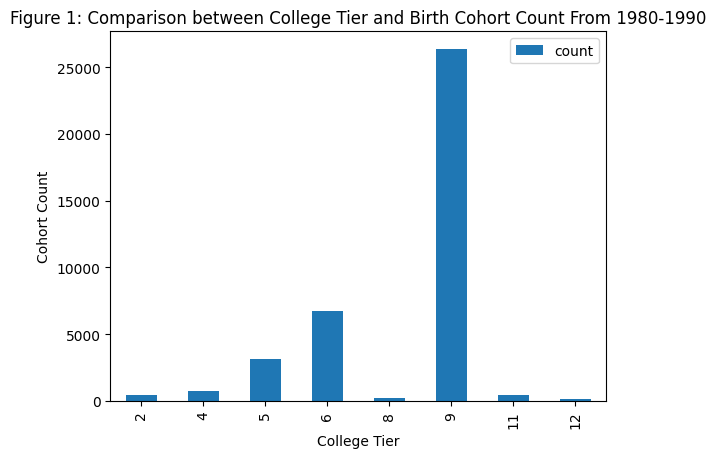

In [88]:
#Figure 1: Comparison between College Tier and Birth Cohort Count From 1980-1990
count = [431,732,3168,6722,207,26356,483,112]
tier = ['2','4','5','6','8','9','11','12']
df = pd.DataFrame({'count':count}, index=index)

ax = df.plot.bar(title='Figure 1: Comparison between College Tier and Birth Cohort Count From 1980-1990',xlabel='College Tier', ylabel='Cohort Count')


In [35]:
#Description and Analysis 
   #Key
      #Count=Birth Cohort Count
      #College tier= College tier by following choices:
        #1 = Ivy Plus 
        #2 = Other elite schools (public and private) 
        #3 = Highly selective public 
        #4 = Highly selective private 
        #5 = Selective public 
        #6 = Selective private 
        #7 = Nonselective 4-year public 
        #8 = Nonselective 4-year private not-for-profit 
        #9 = Two-year (public and private not-for-profit) 
        #10= Four-year for-profit 
        #11= Two-year for-profit 
        #12= Less than two year schools of any type 
        #13= Attending college with insufficient data 
        #14= Not in college between the years of 19-22
        

#The bar graph above illustrates number of counts of each College Tier. 
#The samples obtained were randomly chosen, three random samples from each birth cohort totaling 36 samples. 
#However, Three have been omitted due to incomplete data.Birth cohorts were combined in order to see the frequency of college tier.

#Based on the data, College tier 9 made up about half of the samples (13) making it the mode. 
#As a result, College tier 9 had 26,356 counts. 
#From the code key from the data sheet, “Table 3 Baseline Longitudinal Estimates by College and Child’s Cohort”, College tier 9 represents Two-year (public and private not-for-profit) education.
#The second most frequent was College tier 6 with nine samples totaling 6722 counts. #College tier 6 is represented as selective private education. 
#Overall, there is a contrast preference of selective private education and not-for-profit education.


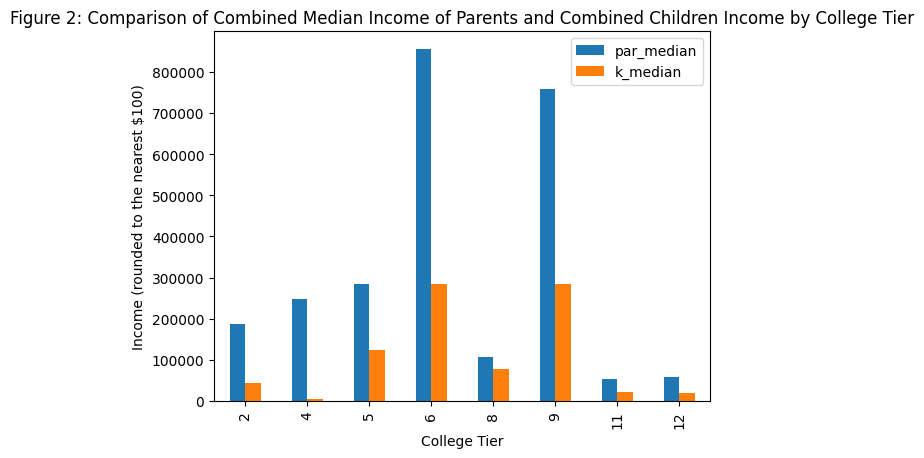

In [87]:
#Figure 2: Comparison of College tier,Parent's and Children's Income

Parent_median_income= [187700,247600,285100,855600,106700,759300,52200,57300]
Children_median_income= [42700,4600, 124600,283700,76700,285100,21400,19600]


index = ['2','4','5','6','8','9','11','12']


df = pd.DataFrame({'par_median': Parent_median_income,'k_median': Children_median_income}, index=index)
ax = df.plot.bar(title='Figure 2: Comparison of Combined Median Income of Parents and Combined Children Income by College Tier',xlabel='College Tier',ylabel='Income (rounded to the nearest $100)')

In [ ]:
# Key of possible college tiers, combined median income
#1 = Ivy Plus 
#2 = Other elite schools (public and private) 
#3 = Highly selective public 
#4 = Highly selective private 
#5 = Selective public 
#6 = Selective private 
#7 = Nonselective 4-year public 
#8 = Nonselective 4-year private not-for-profit 
#9 = Two-year (public and private not-for-profit) 
#10= Four-year for-profit 
#11= Two-year for-profit 
#12= Less than two year schools of any type 
#13= Attending college with insufficient data 
#14= Not in college between the years of 19-22

# Some of the samples (1990,1991,1991,1991) were obmitted due to incomplete information. 
#par_median= Parent's Median Income
#k_median= Kid's Median Income


In [ ]:
#Description and Analysis
   #The bar graph above illustrates a comparison between College Tier, Parent’s Income, and Children’s Income. 
#The samples obtained were randomly chosen, three random samples from each birth cohort totaling 36 samples. 
#However, Three have been omitted due to incomplete data. Median Incomes of Parents and Children were combined to see association between College Tier.
#Birth Cohorts were also grouped together by College Tier. 

#Despite that College Tier 9 is the mode of this sample, Parent’s median income (par_median) is lower compared to College tier 6, $855600 combined median income vs. $759300 combined median, respectively. 
#The graph shows a slight increase from tier 2-tier 6, decreasing sharply at tier 8 then increasing at tier 9 then decreasing at tier’s 11 and 12. 
#For Children (k_median), the median income is lower compared to parents. 
#College tiers 6 and 9 are near the same with $283700 and $285100, as well as tier’s 11 (Two-year for-profit) and tier 12 (Less than two year schools of any type).
#Two-year non-for-profit seem to have better wages compared than Two-year for-profit.
#In addition, the Children’s median income is higher in tier 9 than tier which contradicts as expected since it can be assumed that tier 6 with a higher parent income can also lead to their children having a higher median income. 

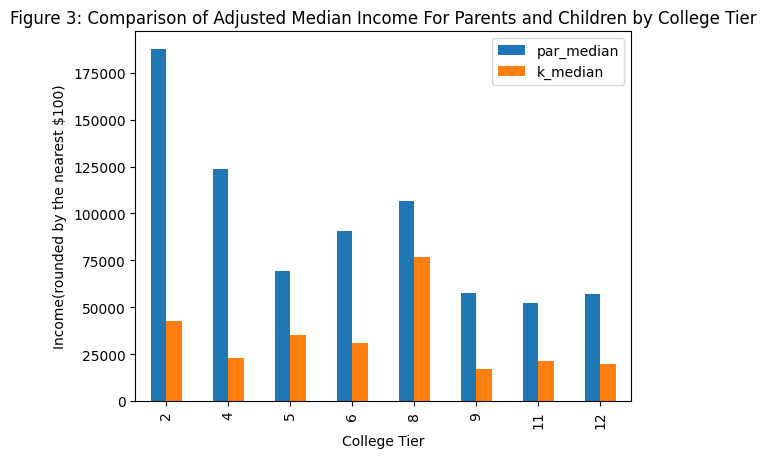

In [86]:
#Figure 3:Adjusted Median Income For Parents and Children

Parent_median_income= [187700,123800,69050,90700,106700,57600,52200,57300]
Children_median_income= [42700,23000,35100,31000,76700,17100,21400,19600]


index = ['2','4','5','6','8','9','11','12']


df = pd.DataFrame({'par_median': Parent_median_income,'k_median': Children_median_income}, index=index)
ax = df.plot.bar(title='Figure 3: Comparison of Adjusted Median Income For Parents and Children by College Tier',xlabel='College Tier',ylabel='Income(rounded by the nearest $100)')

In [ ]:
#Description and Analysis
# Same Key, and code words from Figures 1 and 2

#As a result from combining the median incomes and frequency in some tiers than others, this bar graph illustrates an adjusted median income of parents and children by college tier. 
#The sample was used from previous graphsIn this graph, instead of combining the median incomes of each tier group the median was calculated. 
#Basically, this represents the ‘median of the median’ of Parent’s and Children’s income. By adjusting the median income, tier 2 would have the highest parent income followed by tier 4 which is ‘highly selective private’ education. 
#Tier 6 is still higher parental income than 9. 
#The graph starts with an increase then decreases, increases and decreases again. 
#Tier 8 is nearly doubles  tier 9 and also higher than tier 6 with $106700. 
#Tier 8 is ‘Nonselective 4-year private not-for-profit’. 
#Tier 8 children’s median income is much closer to parent’s median income compared to the rest of the college tiers listed with $76700.  

In [ ]:
#Conclusion of Question 3
#Overall, the purpose of these three figures was to examine the relationship between Parent’s median income, Children’s median income and College tier. #Based on the sample obtained, there is more preference for two-year (public and private not-for-profit) institutions. 
#Despite being the most frequent, the combined median incomes and adjusted median incomes for both parent’s and children are less compared to the other college tiers. 
#This can suggest that College tier 9 is more affordable compared to the other college tiers in this sample. 
#Having less schooling also relates to having a higher or lower median income. 
#Tiers 11 and 12 are among the bottom tiers thus the incomes are lower.  
#Tier 6, the second most frequent tier  has a higher combined income due to selective private education. 
#Tuition costs more in Selective Private, Highly selective private, Ivy Leagues or Elite Schools requiring more income. 
#Yet, the children’s median income isn’t as near as their parents. 
#This still holds true while adjusting the median income as a median rather than a combination. 
#Further Implications,Considerations, Suggestions, or Limitations of each figure are outlined below.





In [ ]:
#Further Implications,Considerations, Suggestions, or Limitations Section:

#Figure 1: Implications can be looking to see which types of schools are more popular among certain birth cohorts, for example which college tier is most preferred for those born in 1980 vs 1991 or throughout 1980-1991? 
#Another thing to consider is the historical context of each year. 
#What customs or external factors that could have influenced the beliefs or economic status of parents and children?
#For example, further research on  is it tradition for children to go to the same institutions for their parents? 
#Is the cohort participants choosing proximity or wanting to get away from their parents when it comes to college tier choice? 

#Figure2: Given the number of counts of each cohort and frequency of tiers, other considerations for further analysis would be calculating the mean, obtaining more samples of College tier 2,4,8,11 and 12.  
#For example, tier 2 represents ‘other elite schools’. 
#The median income of this one sample obtained is $187700 parents income which is greater than the rest of median income samples obtained from tier 6. 
#However, if we were to consider counts there were 431 counts for tier 2 while 6722 counts for tier 6. 
#The average, then calculated by income/cohort counts would be 435.5 vs.127.3. For median children income, we see that tier 2 is $42700 and the average by count would be 99.07 while tier 6 would be 42.1 average by count. Another consideration is currency. 
#Parent’s earning in the 80s had a different value of their currency than in the 90s. Inflation or other economic crisis can harm the dollar or in the contrary, economic boom which we say in the 50s created more earnings.
#Depending on the situation, it would have been more affordable or easier to enroll in certain college tiers. 

#Figure 3: Similar idea as with figure 2, other implications and considerations would be different visual representations or calculating the mean of these values. 


In [ ]:
#Other: 
#The data set doesn’t specify the likelihood of students who transferred which could implicate they have experience more than one type of education. 
#Some calculations were done manually (combined incomes, adjusted incomes, sorted and finding the median, finding the random samples and locating them on the spreadsheet).Although aware of the formulas (.sum(),sort.values,.mean(),.median(), etc)I would encounter some errors in setup so I preffered to manually do these calculations until I understand fully.
#See other sections of this report on how implications and further research can be connected. 


In [ ]:
#Notes:
#Code obtained here was from various sources.The cleaning was previous module challenge I did through myself and ASKBCS.I learned about thresholds and axis,insnull,dropping columns and adding subsets.DataFrames and visuals are guidance from Pandas website, Mathplotib website,course website, and myself. I would encounter frequent errors so I would use ASK BCS and Stack Overflow for help.  
##The data examined is from the data sheet “Table_3_ Baseline_Longitudinal_Estimates_by_College_and_Child’s_Cohort”, please visit https://opportunityinsights.org/wp-content/uploads/2018/04/Codebook-MRC-Table-3.pdf and https://opportunityinsights.org/data/ for more information. 